<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Assignment%2013%20-%20Classification%20Neural%20Network%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1> Classification Task with Neurel Network Model 

<H2> Handling Data for Model 

In [50]:
# Get Data 

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
# Checking Data Shape 
train_images.shape

(60000, 28, 28)

In [52]:
# Plot sample of data 

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
 

first_image = test_images[0]
cv2_imshow(first_image)

In [53]:
# Reshaping Data 

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images.shape

(60000, 784)

In [54]:
# Labeling Data classes 

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

<H2> Make Our Neurel Network Model  

In [55]:
# Model Layers 

from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(700, activation='relu', name='Layer_1', input_shape=(28 * 28,)))
network.add(layers.Dense(10, name='Layer_2' , activation='softmax'))
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 700)               549500    
                                                                 
 Layer_2 (Dense)             (None, 10)                7010      
                                                                 
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________


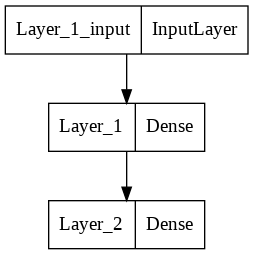

In [56]:
# Plot Model Layers

from tensorflow.keras.utils import plot_model
plot_model(network)

In [57]:
# Model's Metric & Optimizer
 
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [58]:
# Model Learning 

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2555 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0999 - accuracy: 0.9702
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0322 - accuracy: 0.9904


In [59]:
# Getting Model's Accuracy for Test data 

test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9804


label = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  with argmax = 7


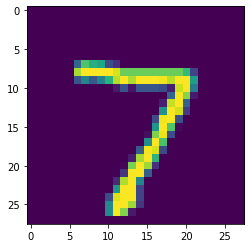

In [60]:
# Validate Sample of data 

import matplotlib.pyplot as plt
import numpy as np
ID  = 0
img = test_images[ID]
plt.imshow(np.reshape(img, (28,28)))
print(f"label = {test_labels[ID]}  with argmax = {np.argmax(test_labels[ID])}")